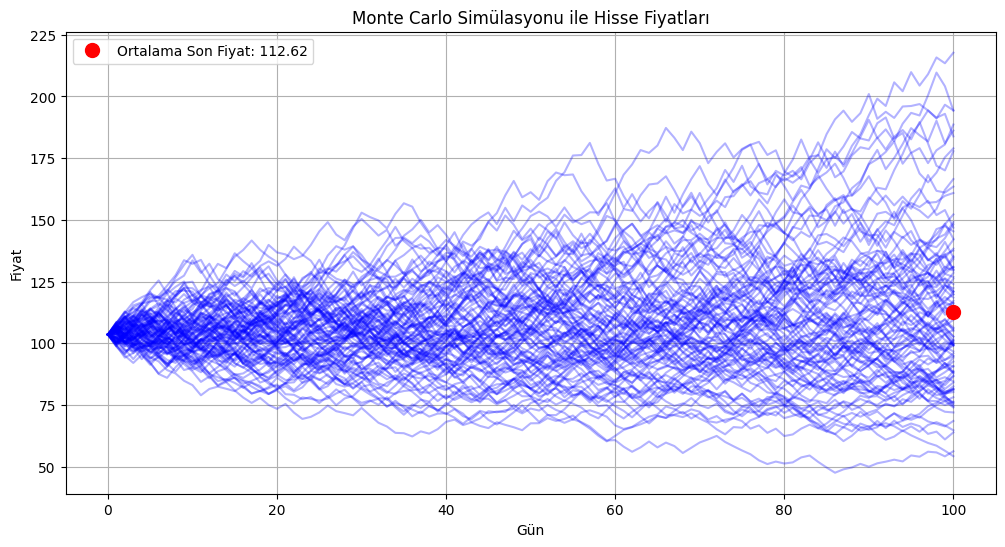

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


transition_matrix = np.load("matrix.npy")

# Durumlar
states = ["bull", "horizontal", "bear"]
state_dict = {state: i for i, state in enumerate(states)}

# Simülasyon parametreleri
num_simulations = 1000  # Kaç farklı fiyat hareketi simüle edilecek
num_days = 100  # Kaç günlük fiyat tahmini yapılacak

initial_state = np.random.choice(states)

# Fiyat serilerini oluşturmak için liste
price_simulations = []

for _ in range(num_simulations):
    state = initial_state
    prices = [103.5]  # Başlangıç fiyatı
    for _ in range(num_days):
        current_state_idx = state_dict[state]
        next_state_idx = np.random.choice([0, 1, 2], p=transition_matrix[current_state_idx])
        state = states[next_state_idx]

        # Fiyat değişimi
        if state == "bull":
            prices.append(prices[-1] * np.random.uniform(1.01, 1.05))  # %1-5 artış
        elif state == "bear":
            prices.append(prices[-1] * np.random.uniform(0.95, 0.99))  # %1-5 düşüş
        else:
            prices.append(prices[-1] * np.random.uniform(0.99, 1.01))  # %1'e kadar değişim
    price_simulations.append(prices)

# Simülasyon sonuçlarını görselleştir (ilk 100 simülasyonu çiz)
plt.figure(figsize=(12, 6))
for sim in price_simulations[:100]:
    plt.plot(sim, alpha=0.3, color='blue')

# Tüm simülasyonların son fiyatlarının ortalamasını hesapla
last_prices = [sim[-1] for sim in price_simulations]
average_last = np.mean(last_prices)

# Ortalama son fiyat kırmızı nokta (x koordinatı num_days)
plt.plot(num_days, average_last, 'ro', markersize=10, label=f'Ortalama Son Fiyat: {average_last:.2f}')

plt.title("Monte Carlo Simülasyonu ile Hisse Fiyatları")
plt.xlabel("Gün")
plt.ylabel("Fiyat")
plt.grid(True)
plt.legend()
plt.show()